# Multivariate

We have dealt with univariate data in module 1. 
All the datasets we looked into were multivariate but we were interested in analyzing individual variables, trying to do descriptive and inferential statistics and understanding how values are distributed etc. 
In this second module we are focusing on dealing with multivariate data.

Multivariate can have two or more dimensions.  
Often, more than one variable is collected in an experiment or any observation.
When considering multivariate data, we must take into account interdependencies and correlations of components of the data vectors.
For example, in a demographic study, many features such as age, sex, race, education, job, income level etc. are included in the survey. 
The datasets will have more than two quantitative variables for each row or observation. 

A key issue to address is that with increasing wide data sets, meaning vary large number of componenets, it becomes increasingly more challenging to do visual exploration of the data.
It was possible when looking at a data set of 2, 3, 4 variables as was done in the lecture videos.

## Data Set : Kings County, WA housing data

In this lab, we will try to summarize the data as we have done with univariate data in module 1.
However, we will use a wider data set.
This is a data set of housing prices data of Kings county in Washington. 
The dataset is relatively big compared to previous ones we worked on. 
It contains information on house sale prices for King County, which includes Seattle. 
It has over 21k rows of data to play with. 
It has 21 dimensions with 2 non predictor variables id and date, 18 predictor variables and 1 response variable price. The discussion starts with bivariate data.

### Loading data

In [2]:
housing_prices <- read.csv("../../../datasets/house_sales_in_king_county/kc_house_data.csv")
head(housing_prices)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [4]:
# We can examine the structure of dataframe as follows
str(housing_prices)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

Str() gave us an overall sense of the data. 

__We see__ that we have 21613 observations and 21 variables.

For this data set, can see various numeric and integer components to our multivariate data. 
Each line in the structure above is a vector component, therefore the vector structure is:  
*(id,data,price,bedrooms, ... ,sqft_living15,sqft_loft)*

We will not be worried about id, as it is just a sequential counter. 


Lets dig deep into the data by doing some univariate analysis just like what we did in module 1.
Run summary() on all variables

In [5]:
summary(housing_prices)

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

Each variable has a different scale of values. 
Some range from 0 to 1 and some vary over long ranges. 
*bedrooms* looks interesting with a maximum value of 33. 
There could be possible outliers, we will look into that shortly. 

For data sets such as this, you need to apply some cultural and domain understanding to the data.

For instance, we see *zipcode* is being treated as a numerical value.
However, we know zipcodes are actually buckets of an area, i.e., **factors**.

In another example, the *yr_renovated* has a **min** and **median** value of 0; and it has **mean value of 84.4**.
From this, we should probably surmise that **yr_renovated** defaults to 0 if the property has not been renovated.

All of these things should be kept in mind as we begin to try modelling our data.

### Univariate analysis

Lets go and plot histograms for all 18 variables and look into their distribution.

`gridExtra`: This R library helps you arrange multiple grid-based plots on a page, and draw tables. We are plotting 18 different histograms and arranging them in a grid. 

`ggplot2`: ggplot2 is commonly used package for doing visualizations. It takes care of many of the fiddly details that make plotting a hassle (like drawing legends).

__Reference__: https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html  
__Reference__: http://docs.ggplot2.org/dev/vignettes/qplot.html  


Loading required package: gridExtra
Loading required package: ggplot2


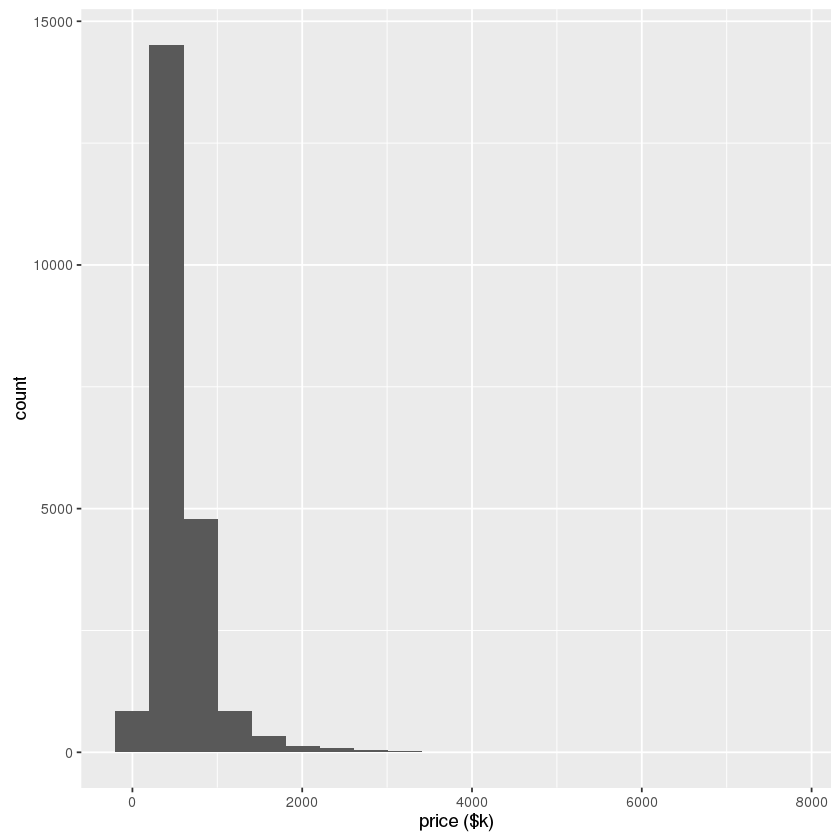

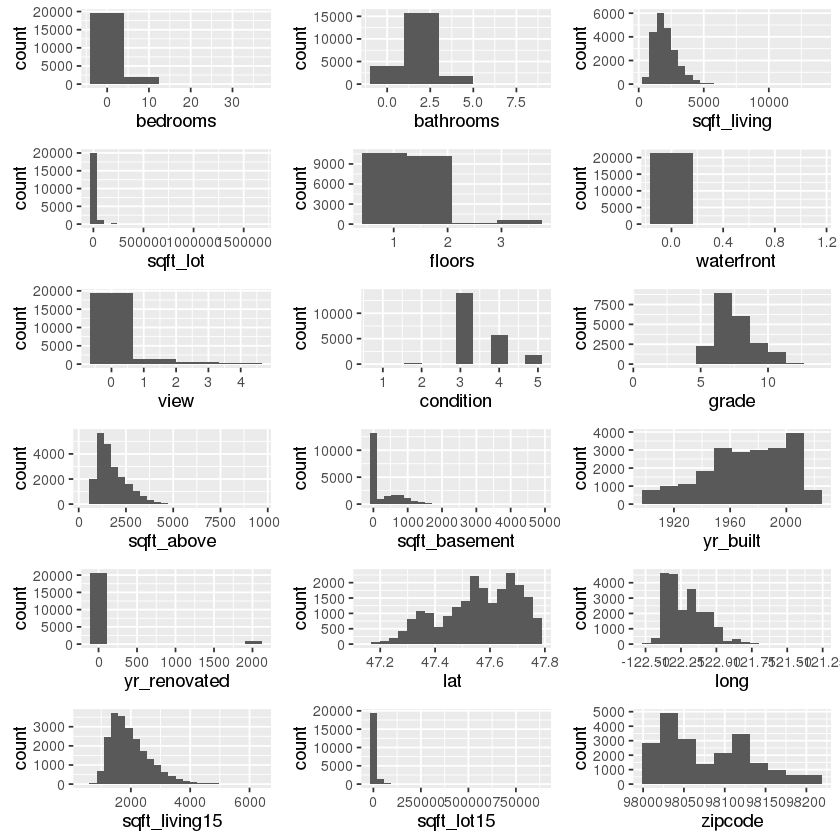

In [6]:
require(gridExtra)
require(ggplot2)

## grid.arrange(x1,x2,x3...xn,ncol=x,nrow=y)
## The command will arrange the plots x1,x2....xn in the desired outlet of specified rows and columns

# The number of bins should be chosen as appropriate. If you are not sure then trial and error is the best way to figure out the 
# right number of bins. Each bin will have observations equal to bin size. 

# In the case of price, I am going to divide by 1000 to get the price in $1000's 
qplot(housing_prices$price/1000,bins = 20,xlab='price ($k)')

grid.arrange(
             qplot(housing_prices$bedrooms,bins = 5,xlab='bedrooms'),
             qplot(housing_prices$bathrooms,bins = 5,xlab='bathrooms'),
             qplot(housing_prices$sqft_living,bins = 25,xlab='sqft_living'),
             qplot(housing_prices$sqft_lot,bins = 25,xlab='sqft_lot'),
             qplot(housing_prices$floors,bins = 4,xlab='floors'),
             qplot(housing_prices$waterfront,bins = 4,xlab='waterfront'),
             qplot(housing_prices$view,bins = 4,xlab='view'),
             qplot(housing_prices$condition,bins = 10,xlab='condition'),
             qplot(housing_prices$grade,bins = 10,xlab='grade'),
             qplot(housing_prices$sqft_above,bins = 25,xlab='sqft_above'),
             qplot(housing_prices$sqft_basement,bins = 25,xlab='sqft_basement'),
             qplot(housing_prices$yr_built,bins = 10,xlab='yr_built'),
             qplot(housing_prices$yr_renovated,bins = 10,xlab='yr_renovated'),
             qplot(housing_prices$lat,bins = 20,xlab='lat'),
             qplot(housing_prices$long,bins = 20,xlab='long'),
             qplot(housing_prices$sqft_living15,bins = 25,xlab='sqft_living15'),
             qplot(housing_prices$sqft_lot15,bins = 25,xlab='sqft_lot15'),
             qplot(housing_prices$zipcode,bins = 10,xlab='zipcode'),
             ncol = 3)

Now lets dive down on a few of the plots to see the actual histograms as a table of values using the *table* function.

__Reference__: https://www.r-bloggers.com/r-function-of-the-day-table/


In [7]:
table(housing_prices$bedrooms)
table(housing_prices$bathrooms)
table(housing_prices$floors)
table(housing_prices$view)
table(housing_prices$yr_renovated)


   0    1    2    3    4    5    6    7    8    9   10   11   33 
  13  199 2760 9824 6882 1601  272   38   13    6    3    1    1 


   0  0.5 0.75    1 1.25  1.5 1.75    2 2.25  2.5 2.75    3 3.25  3.5 3.75    4 
  10    4   72 3852    9 1446 3048 1930 2047 5380 1185  753  589  731  155  136 
4.25  4.5 4.75    5 5.25  5.5 5.75    6 6.25  6.5 6.75  7.5 7.75    8 
  79  100   23   21   13   10    4    6    2    2    2    1    1    2 


    1   1.5     2   2.5     3   3.5 
10680  1910  8241   161   613     8 


    0     1     2     3     4 
19489   332   963   510   319 


    0  1934  1940  1944  1945  1946  1948  1950  1951  1953  1954  1955  1956 
20699     1     2     1     3     2     1     2     1     3     1     3     3 
 1957  1958  1959  1960  1962  1963  1964  1965  1967  1968  1969  1970  1971 
    3     5     1     4     2     4     5     5     2     8     4     9     2 
 1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984 
    4     5     3     6     3     8     6    10    11     5    11    18    18 
 1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997 
   17    17    18    15    22    25    20    17    19    19    16    15    15 
 1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010 
   19    17    35    19    22    36    26    35    24    35    18    22    18 
 2011  2012  2013  2014  2015 
   13    11    37    91    16 

### Observations based on histograms

* Bedrooms: Bedrooms variable appears to have outliers but it could be a valid value. 

* Bathrooms and floors have decimal values which may not be correct. We cannot even make an assumption that those numbers are an average of number of bathrooms/floors in an area because there are single observations with values like 7.5, 7.75 for number of bathrooms.

* Year renovated: Not many houses are renovated. Most of the renovated houses are from 90's.

We have to identify independent variables that are related to our response variable price. 
To do this, we will look for bivariate relationship. 

We know, culturally, that bedrooms will be a major decider in price of a house. 
So, lets look at this and test our expectation with a scatter plot between price and bedrooms and add a regression line.

__Reference__: http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/


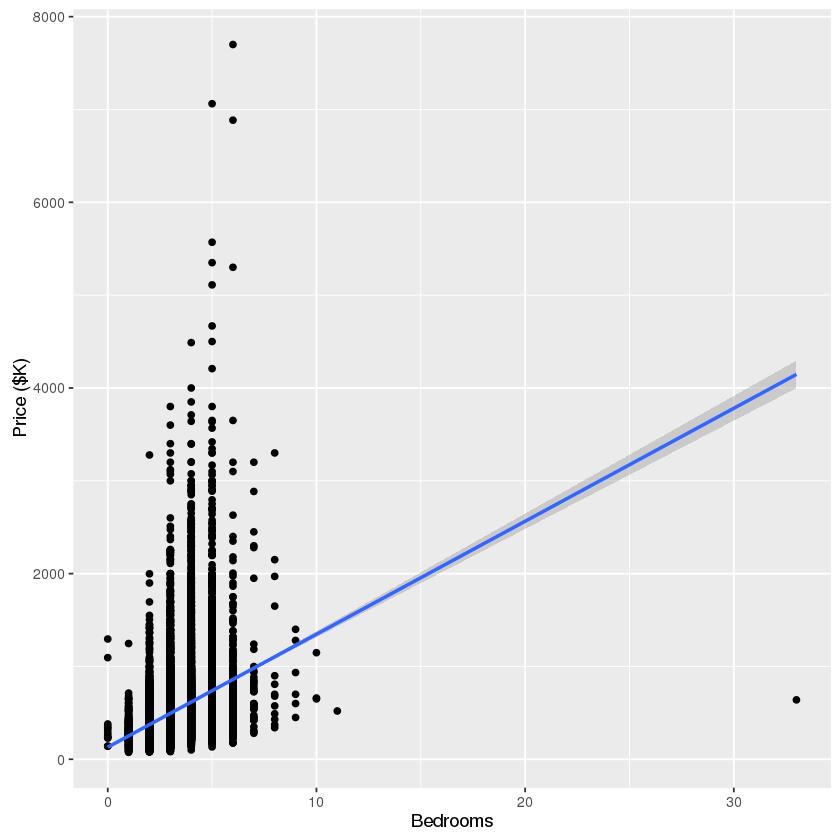

In [8]:
# Plot housing prices, use the bedrooms as the x-axis and the price as the y access
ggplot(housing_prices, aes(x=bedrooms,y=price/1000)) +  # Note, the plus here lets R know that the command will coninue
# Add a X axis label
 xlab("Bedrooms") +
# Add a Y axis label
 ylab("Price ($K)") +
# set the data plotting to be points with an aesthetic of colour=view
 geom_point() +  
# add the smooth geometry element with a lineary model, i.e., using the lm()
 geom_smooth(method=lm)

This is our basic plot.  

Something that often helps in plots is to bring another feature of the data into the plot via use of colors.

We will re-do the plot, using some variables as colors.

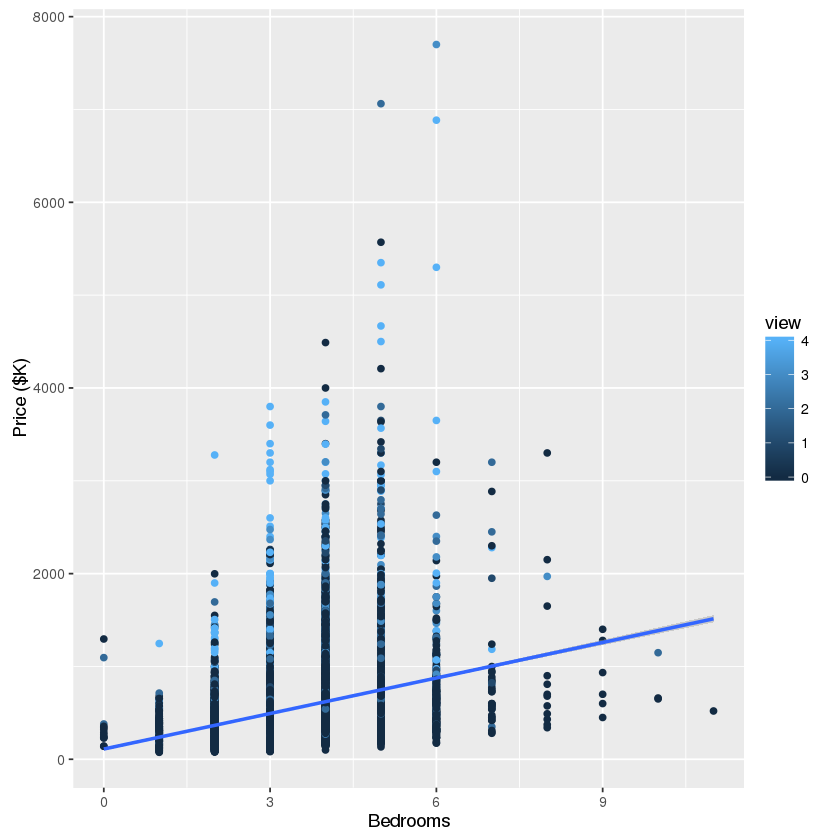

In [20]:
# Plot housing prices, use the bedrooms as the x-axis and the price as the y access
ggplot(housing_prices, aes(x=bedrooms,y=price/1000)) +  # Note, the plus here lets R know that the command will coninue
# Add a X axis label
 xlab("Bedrooms") +
# Add a Y axis label
 ylab("Price ($K)") +
# This next line causes the view variable to be drive the colors
# set the data plotting to be points with an aesthetic of colour=view
 geom_point(aes(colour = view)) + 
# add the smooth geometry element with a lineary model, i.e., using the lm()
 geom_smooth(method=lm)

#### Try me:
Try changing the `(colour = view)` to use a different variable, such as `bathrooms` or `floors`.

---
33 bedrooms looks like an outlier, because its price is similar to what a 4-bedroom house will cost. 
Look at that particular record in dataset by running the cell below. 
It just has 1.75 bathrooms, and 1620 sqft_living. 

In [10]:
housing_prices[housing_prices$bedrooms==33,]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15871,2402100895,20140625T000000,640000,33,1.75,1620,6000,1,0,0,⋯,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Looks like the observation is an outlier. Lets remove it from the dataset.
Then repeat our plot!

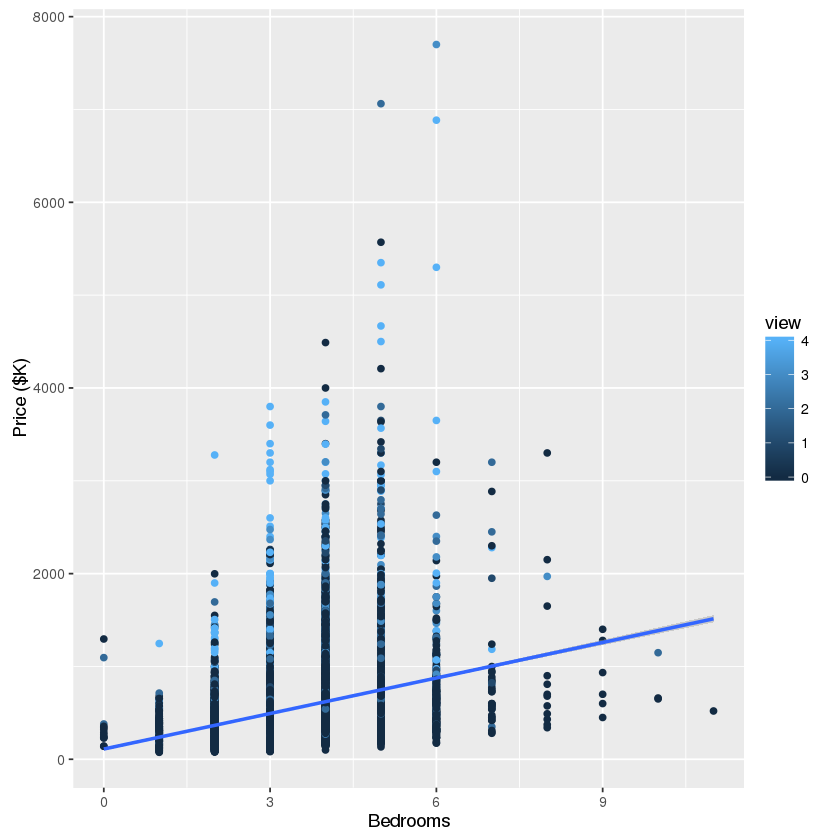

In [11]:
housing_prices=housing_prices[!housing_prices$bedrooms %in% c(33),]
ggplot(housing_prices, aes(x=bedrooms,y=price/1000)) +  # Note, the plus here lets R know that the command will coninue
 xlab("Bedrooms") + ylab("Price ($K)") +  geom_point(aes(colour = view)) + geom_smooth(method=lm)

Lets generate scatter plots between price and some independent variables. 

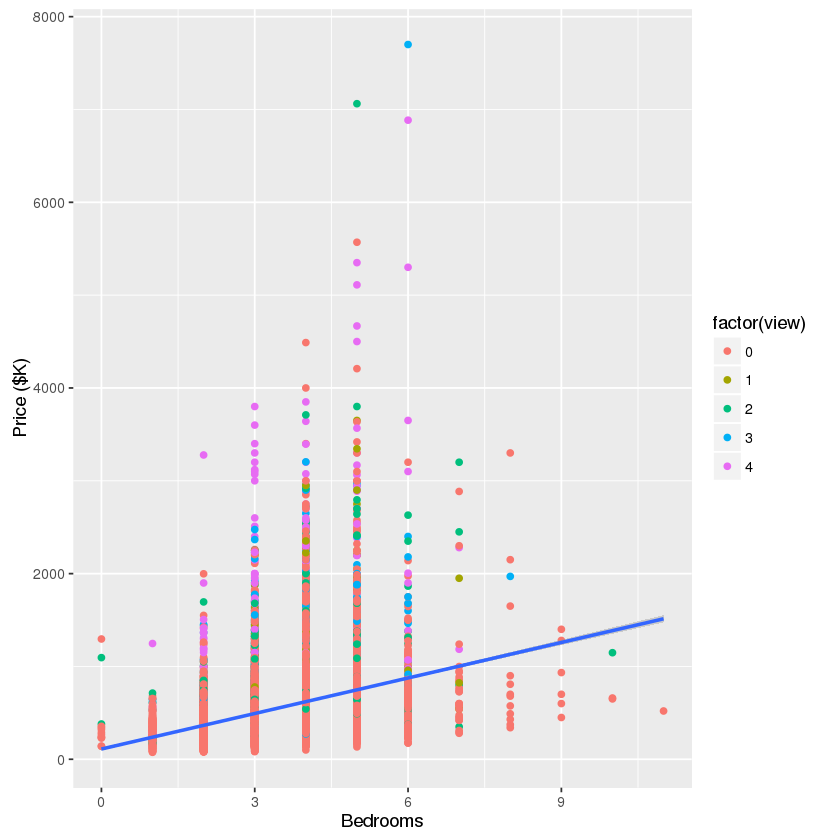

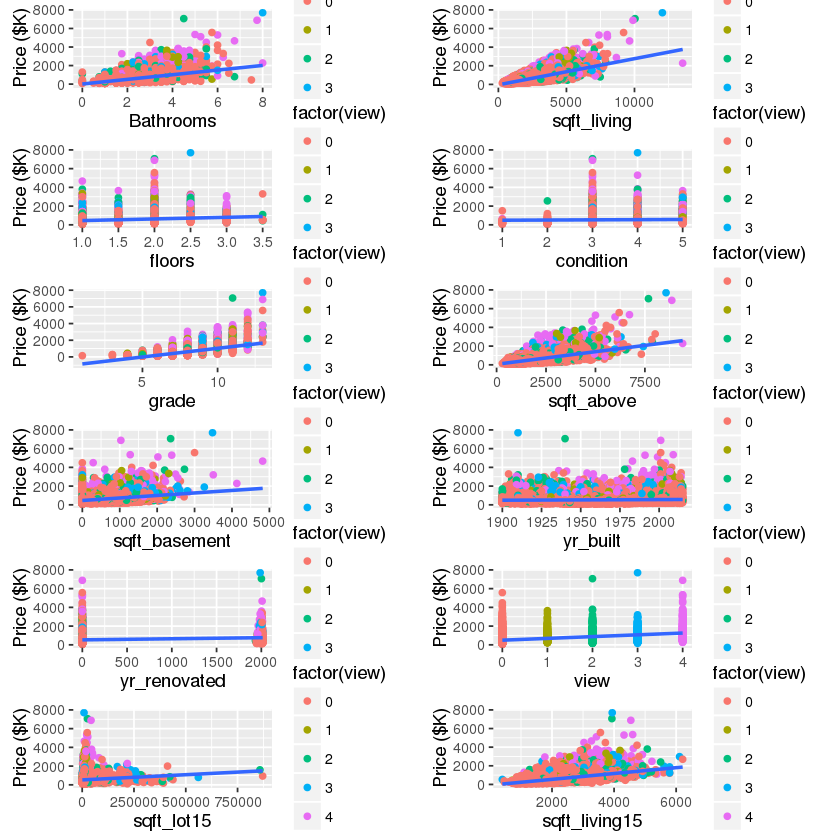

In [12]:
library(gridExtra)
library(ggplot2)

ggplot(housing_prices, aes(x=bedrooms,y=price/1000)) + xlab("Bedrooms")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm)

grid.arrange(
    
    ggplot(housing_prices, aes(x=bathrooms,y=price/1000)) + xlab("Bathrooms")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_living,y=price/1000)) + xlab("sqft_living")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=floors,y=price/1000)) + xlab("floors")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=condition,y=price/1000)) + xlab("condition")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=grade,y=price/1000)) + xlab("grade")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_above,y=price/1000)) + xlab("sqft_above")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_basement,y=price/1000)) + xlab("sqft_basement")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=yr_built,y=price/1000)) + xlab("yr_built")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=yr_renovated,y=price/1000)) + xlab("yr_renovated")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=view,y=price/1000)) + xlab("view")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_lot15,y=price/1000)) + xlab("sqft_lot15")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_living15,y=price/1000)) + xlab("sqft_living15")+ ylab("Price ($K)") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    
    ncol=2)

### Observations:

Which variables seem to have no correlation to price?  These are the flat lines, where price does not grow.
 * floors
 * condition
 * yr_built

Which variables seem to have the strongest correlation to price?
 1. sqft_living
 2. bathrooms
 3. sqft_above
 4. bedrooms

Lets confirm this with a correlation matrix.
First, we must down select to have a purely numeric data frame, otherwise we get an error such as:  
```
Error in cor(housing_prices): 'x' must be numeric
```


In [13]:
hp <- housing_prices[c("price","bedrooms","floors","condition","yr_built","sqft_living","bathrooms","sqft_above","bedrooms","sqft_basement","grade")]
cor(hp)

,price,bedrooms,floors,condition,yr_built,sqft_living,bathrooms,sqft_above,bedrooms.1,sqft_basement,grade
price,1.00000000,0.31544486,0.2568108,0.03633609,0.05402275,0.70204664,0.5251471,0.60559116,0.31544486,0.32381155,0.6674473
bedrooms,0.31544486,1.00000000,0.1810849,0.02547788,0.15916748,0.59146722,0.5291589,0.49059957,1.00000000,0.30948985,0.3665023
floors,0.25681083,0.18108490,1.0000000,-0.26370598,0.48930186,0.35393700,0.5006454,0.52386648,0.18108490,-0.24568411,0.4581710
condition,0.03633609,0.02547788,-0.2637060,1.00000000,-0.36137967,-0.05870441,-0.1249463,-0.15813625,0.02547788,0.17405696,-0.1446315
yr_built,0.05402275,0.15916748,0.4893019,-0.36137967,1.00000000,0.31803659,0.5060120,0.42387874,0.15916748,-0.13310281,0.4469522
sqft_living,0.70204664,0.59146722,0.3539370,-0.05870441,0.31803659,1.00000000,0.7546626,0.87659731,0.59146722,0.43506488,0.7627015
bathrooms,0.52514709,0.52915887,0.5006454,-0.12494629,0.50601197,0.75466260,1.0000000,0.68533918,0.52915887,0.28378858,0.6649785
sqft_above,0.60559116,0.49059957,0.5238665,-0.15813625,0.42387874,0.87659731,0.6853392,1.00000000,0.49059957,-0.05191754,0.7559193
bedrooms.1,0.31544486,1.00000000,0.1810849,0.02547788,0.15916748,0.59146722,0.5291589,0.49059957,1.00000000,0.30948985,0.3665023
sqft_basement,0.32381155,0.30948985,-0.2456841,0.17405696,-0.13310281,0.43506488,0.2837886,-0.05191754,0.30948985,1.00000000,0.1684116


Looking down the first column, we can see the three most correlated variables to price are:
 1. sqft_living
 2. grade
 3. sqft_above
 4. bathrooms
 
Note that bedrooms, which we traditionally think as a large driver of home price only has a 0.315 correlation value.

Let's drop some columns from our working data frame and get a big picture!


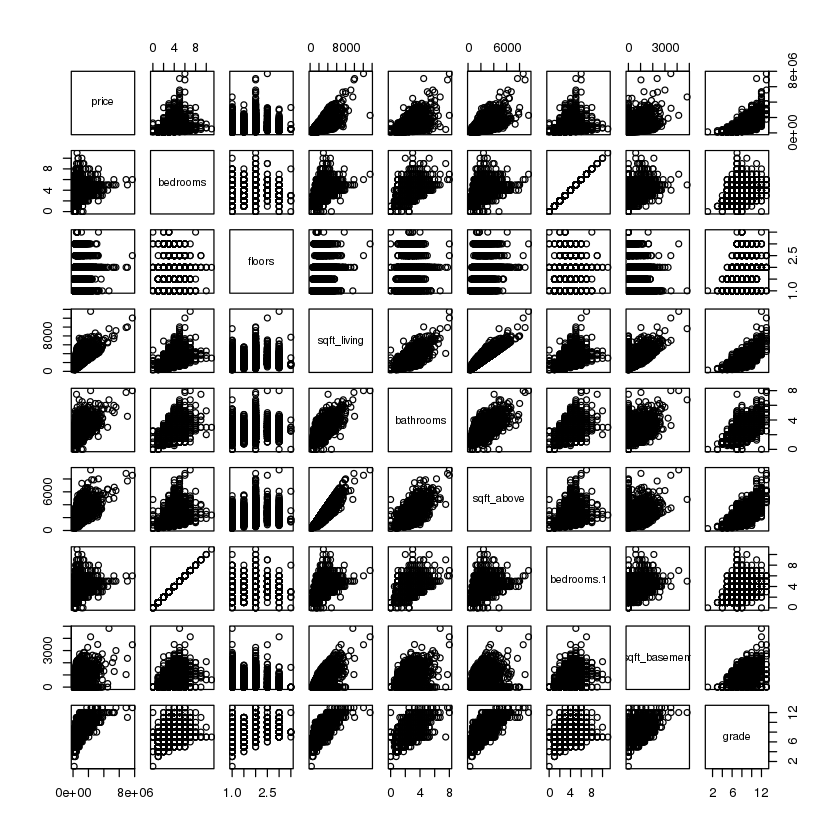

In [14]:
# setting a column to NULL removes it from the data frame
hp$condition <- NULL
hp$yr_built <- NULL
plot(hp)

#
# NOTE: This cell may take a minute to complete running.
# 

## Linear Regression Model

### Recall from lecture, linear model solver

#### Using linear model solver, _lm()_

lm function computes a linear regression
*  LHS ~ RHS is the model to compute.  
  *  Left-hand-side(LHS) is the dependent variable
  *  Right-hand-side(RHS) are the independent variables (predictors)
  
Our model will be:
```R
price ~ ?
```
We will start with just two predictors, the highest correlation found previously.
 1. sqft_living
 2. grade


In [15]:
# fit variable will hold a statistical model
fit <- lm(price ~ sqft_living + grade, data=hp)
summary(fit) # show results of analysis


Call:
lm(formula = price ~ sqft_living + grade, data = hp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1065471  -138298   -25032   100451  4794600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.982e+05  1.330e+04  -44.98   <2e-16 ***
sqft_living  1.844e+02  2.869e+00   64.29   <2e-16 ***
grade        9.856e+04  2.241e+03   43.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 250500 on 21609 degrees of freedom
Multiple R-squared:  0.5345,	Adjusted R-squared:  0.5345 
F-statistic: 1.241e+04 on 2 and 21609 DF,  p-value: < 2.2e-16


**NOTE** The R-squared error is 0.5345.

__Reference/Reading__: [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination#As_squared_correlation_coefficient)


What if we add the next predictor, sqft_above?

In [16]:
# fit variable will hold a statistical model
fit3 <- lm(price ~ sqft_living + grade + sqft_above, data=hp)
summary(fit3) # show results of analysis


Call:
lm(formula = price ~ sqft_living + grade + sqft_above, data = hp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1119289  -136703   -24163    97122  4759432 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.512e+05  1.355e+04  -48.08   <2e-16 ***
sqft_living  2.347e+02  4.037e+00   58.13   <2e-16 ***
grade        1.100e+05  2.319e+03   47.43   <2e-16 ***
sqft_above  -7.768e+01  4.424e+00  -17.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 248700 on 21608 degrees of freedom
Multiple R-squared:  0.5411,	Adjusted R-squared:  0.541 
F-statistic:  8492 on 3 and 21608 DF,  p-value: < 2.2e-16


**NOTE** The R-squared error is 0.5411.

What if we add the next predictor, bathrooms?

In [17]:
# fit variable will hold a statistical model
fit4 <- lm(price ~ sqft_living + grade + sqft_above + bathrooms, data=hp)
summary(fit4) # show results of analysis


Call:
lm(formula = price ~ sqft_living + grade + sqft_above + bathrooms, 
    data = hp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1063575  -135183   -22913    98285  4766867 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.503e+05  1.351e+04  -48.13   <2e-16 ***
sqft_living  2.525e+02  4.350e+00   58.05   <2e-16 ***
grade        1.151e+05  2.359e+03   48.77   <2e-16 ***
sqft_above  -7.685e+01  4.412e+00  -17.42   <2e-16 ***
bathrooms   -3.706e+04  3.416e+03  -10.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 248100 on 21607 degrees of freedom
Multiple R-squared:  0.5436,	Adjusted R-squared:  0.5435 
F-statistic:  6433 on 4 and 21607 DF,  p-value: < 2.2e-16


We can see that as we add predictor (independent variables) with lower correlations to price, we get dimensioning returns on the R-squared ($R^2$) measure of fitness.

Lets finish up this lab with some visualization of the multiple regression models.

Look at our original model, `fit`

In [18]:
fit


Call:
lm(formula = price ~ sqft_living + grade, data = hp)

Coefficients:
(Intercept)  sqft_living        grade  
  -598157.0        184.4      98559.0  


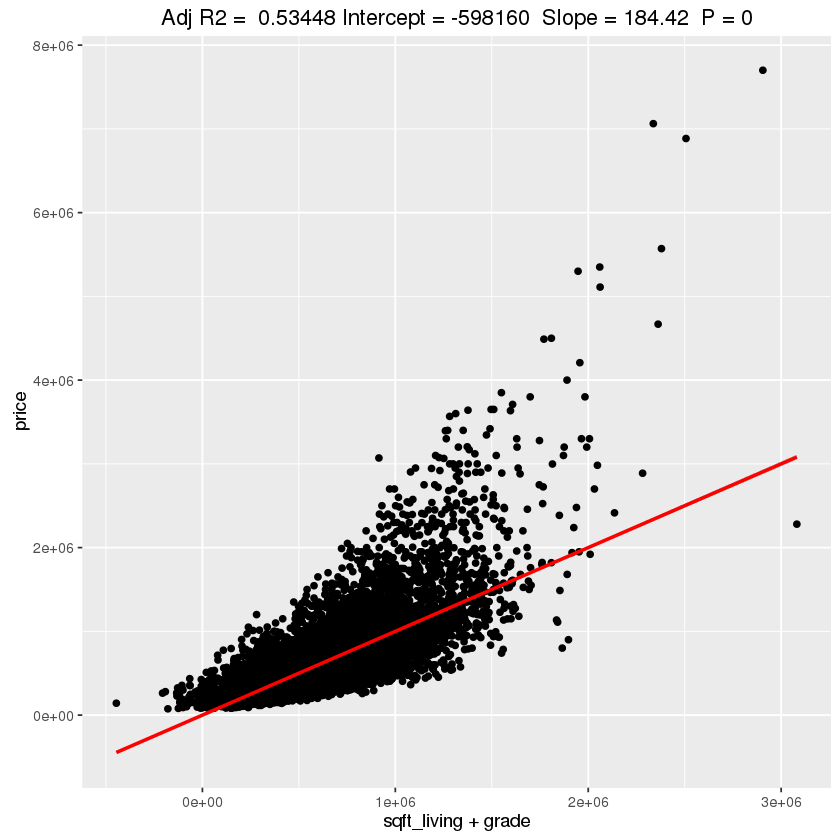

In [19]:
require(ggplot2)

########################
#  adapted from: 
# https://susanejohnston.wordpress.com/2012/08/09/a-quick-and-easy-function-to-plot-lm-results-in-r/
########################

    # Note that fit is an object with various things, such as a model.
ggplot(hp, 
       aes_string(
                x = (184.4*hp$sqft_living + 98559.0*hp$grade - 598157.0), 
                y = names(fit$model)[1]
       ) # end of aes_string
  ) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)
                ) # end of title string concatenations
       , x = "sqft_living + grade"
      ) 

Ponder the few changes that are needed to plot the `fit3` or `fit4` models.

# SAVE Your notebook